## 1- Importing Packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as shc
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## 2- Importing Dataset

In [8]:
df = pd.read_csv("B:\ML Jadi\Clustering project\KMeans\Customer.csv")

## 3- Preprocessing

### 3-1- Label encoding

In [9]:
le_Gender = preprocessing.LabelEncoder()
le_Gender.fit(df["Gender"].unique())
df["Gender"] = le_Gender.fit_transform(df["Gender"])

### 3-2-  Selecting features and defining X

In [10]:
X = df[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

### 3-3- Normalization

In [11]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.fit_transform(X)

## 4- Reducing the dimensionality of the Data

In [12]:
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)
reduced_X = pd.DataFrame(reduced_X)
reduced_X.columns = ['P1', 'P2']

## 5- Visualizing Dendrogram

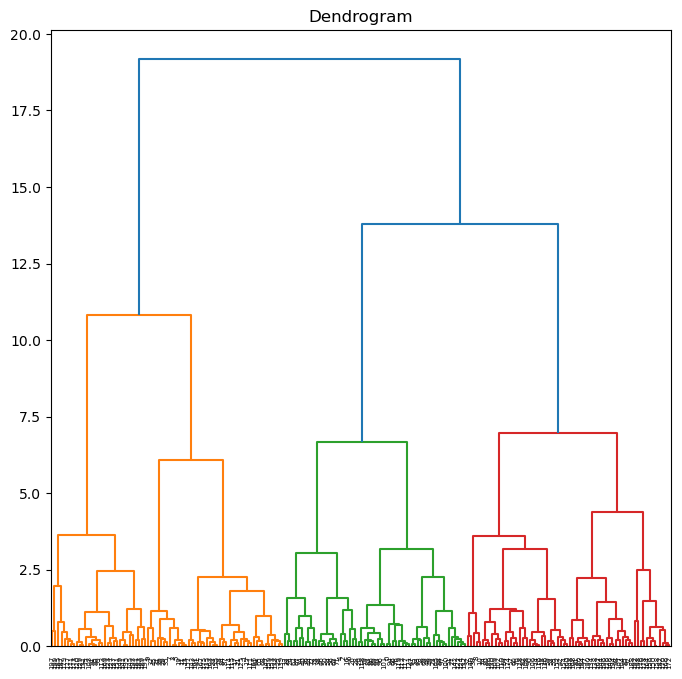

In [30]:
plt.figure(figsize =(8, 8))
plt.title('Dendrogram')
Dendrogram = shc.dendrogram((shc.linkage(reduced_X, method='ward')))
plt.show()

## 6- Applying Agglomerative Clustering with n clusters and visualizing the clusters:

In [16]:
silhouette_scores = []

### 6-1- n=2:

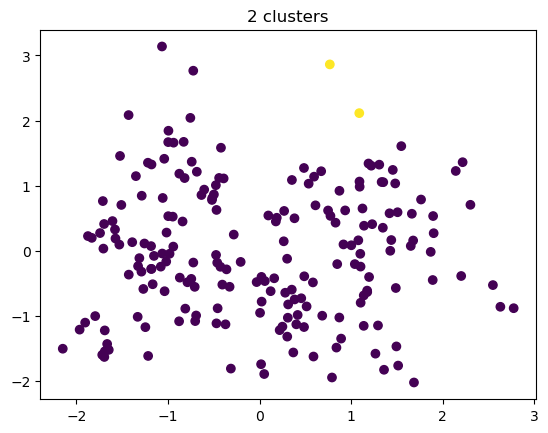

In [17]:
agglom = AgglomerativeClustering(n_clusters=2, linkage="average")
agglom.fit(reduced_X)

silhouette_average_score = silhouette_score(reduced_X, agglom.fit_predict(reduced_X))
silhouette_scores.append(silhouette_average_score)

plt.scatter(reduced_X["P1"], reduced_X["P2"], c=agglom.fit_predict(reduced_X))
plt.title("2 clusters")
plt.show()

### 6-2- n=3:

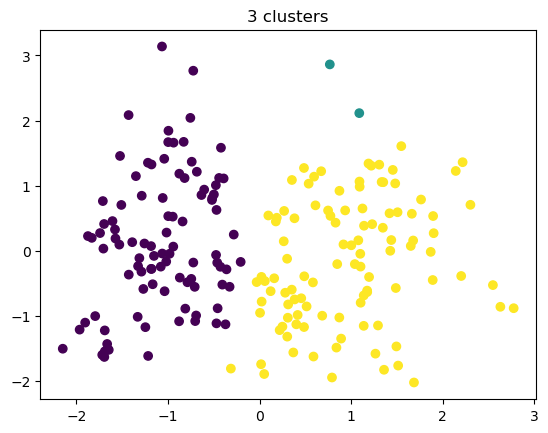

In [18]:
agglom = AgglomerativeClustering(n_clusters=3, linkage="average")
agglom.fit(reduced_X)

silhouette_average_score = silhouette_score(reduced_X, agglom.fit_predict(reduced_X))
silhouette_scores.append(silhouette_average_score)

plt.scatter(reduced_X["P1"], reduced_X["P2"], c=agglom.fit_predict(reduced_X))
plt.title("3 clusters")
plt.show()


### 6-3- n=4:

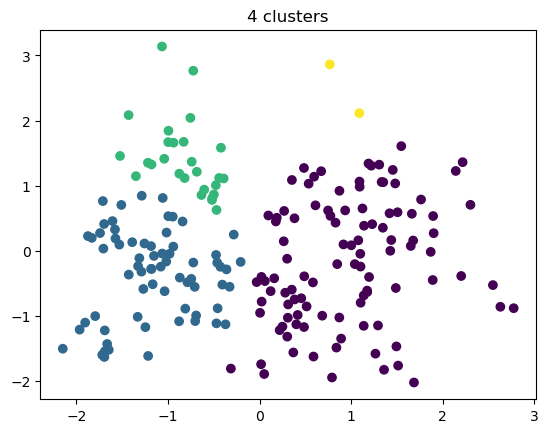

In [19]:
agglom = AgglomerativeClustering(n_clusters=4, linkage="average")
agglom.fit(reduced_X)

silhouette_average_score = silhouette_score(reduced_X, agglom.fit_predict(reduced_X))
silhouette_scores.append(silhouette_average_score)

plt.scatter(reduced_X["P1"], reduced_X["P2"], c=agglom.fit_predict(reduced_X))
plt.title("4 clusters")
plt.show()


### 6-4- n=5:

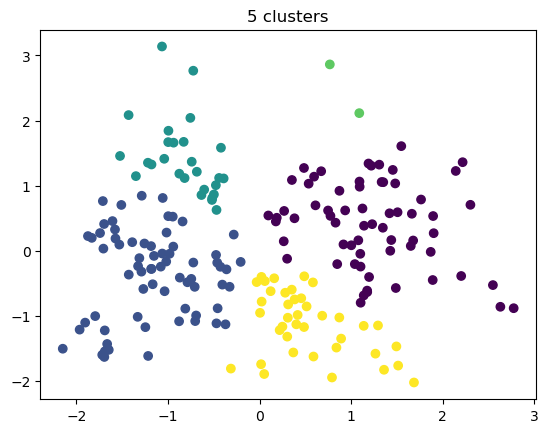

In [20]:
agglom = AgglomerativeClustering(n_clusters=5, linkage="average")
agglom.fit(reduced_X)

silhouette_average_score = silhouette_score(reduced_X, agglom.fit_predict(reduced_X))
silhouette_scores.append(silhouette_average_score)

plt.scatter(reduced_X["P1"], reduced_X["P2"], c=agglom.fit_predict(reduced_X))
plt.title("5 clusters")
plt.show()


### 6-5- n=6:

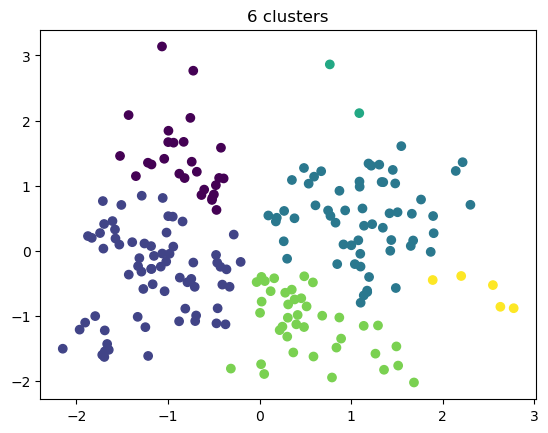

In [21]:
agglom = AgglomerativeClustering(n_clusters=6, linkage="average")
agglom.fit(reduced_X)

silhouette_average_score = silhouette_score(reduced_X, agglom.fit_predict(reduced_X))
silhouette_scores.append(silhouette_average_score)

plt.scatter(reduced_X["P1"], reduced_X["P2"], c=agglom.fit_predict(reduced_X))
plt.title("6 clusters")
plt.show()

## 7- Plotting a bar graph to compare silhouette scores

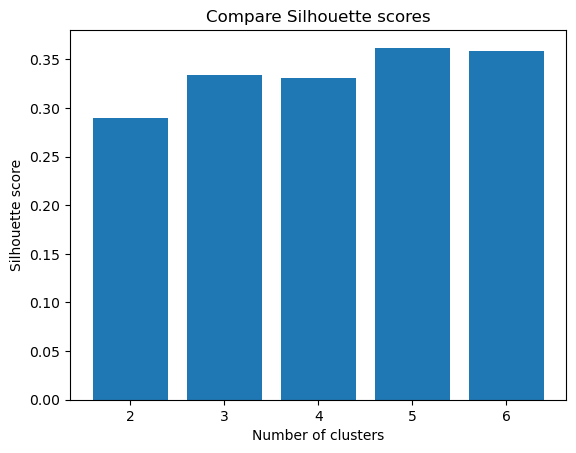

In [22]:
plt.bar(range(2, 7), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title("Compare Silhouette scores")
plt.show()

### So the optimal number of clusters for the given data and clustering technique is 5

## 8- Fitting the agglomerative model with 5 clusters

In [23]:
agglom = AgglomerativeClustering(n_clusters=5, linkage="average")
agglom.fit(X)
df["Labels"] = agglom.labels_

In [24]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,2
3,4,0,23,16,77,1
4,5,0,31,17,40,2
